# Kaggle house price prediction problem

Description of the data 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

1. Load data_combined_cleaned.csv 
2. Filter out all records where SalePrice is nan
3. Perform one hot encoding on full data set
4. Remove Id column from dataset
5. Divide the data into training and test datasets, use test size = 0.3 and random state = 1
6. Create pipeline to scale the data and fit model
7. Find r2 score based on training data and testing data

Cleaned dataset is located in link below
https://github.com/abulbasar/data/tree/master/kaggle-houseprice



In [2]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non

In [5]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [8]:
df = df[~df.SalesPrice.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [9]:
df.select_dtypes(include=[np.object])

,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
5,RL,Pave,None,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,Shed,WD,Normal
6,RL,Pave,None,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
7,RL,Pave,None,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,...,Attchd,RFn,TA,TA,Y,None,None,Shed,WD,Normal
8,RM,Pave,None,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,...,Detchd,Unf,Fa,TA,Y,None,None,None,WD,Abnorml
9,RL,Pave,None,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,...,Attchd,RFn,Gd,TA,Y,None,None,None,WD,Normal


In [10]:
del df["Id"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [13]:
y = df.SalesPrice
X = df.copy()
del X["SalesPrice"]
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 258 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(11), int64(25), uint8(222)
memory usage: 738.6 KB


In [18]:
%%time 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

train R2 0.933719310799 test R2: -7.35962213432e+17
CPU times: user 79.5 ms, sys: 11 ms, total: 90.5 ms
Wall time: 58.5 ms


In [19]:
%%time
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

train R2 1.0 test R2: 0.833664447949
CPU times: user 12.6 s, sys: 1.54 s, total: 14.1 s
Wall time: 9.61 s


In [27]:
%%time
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha = 1, tol=0.0001) )
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

train R2 0.933703571611 test R2: 0.729775659641
CPU times: user 204 ms, sys: 4.08 ms, total: 208 ms
Wall time: 207 ms


/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [28]:
list(pipe.steps[2][1].coef_)

[2997.1905245084981,
 293.18363270766031,
 8311.2746626163935,
 7461.8392280623393,
 5804.5810608004658,
 7868.6850575869021,
 1708.4140260333522,
 2316.132119988024,
 12069.596696690414,
 1814.4012603972906,
 2888.1798767361911,
 3128.060920904938,
 14346.471491788003,
 21974.891167688274,
 1463.3155364429244,
 3812.2303838039361,
 -557.66935895730592,
 549.9381984864533,
 2105.2556540378732,
 1939.2192127486051,
 -797.64046788253268,
 -1663.9276453818018,
 1178.0251910499458,
 4375.1559592107524,
 -2777.1477343819593,
 1284.0473767520191,
 8072.1207674438992,
 1238.4015645709592,
 457.67766233786239,
 712.35838853234088,
 844.23166728626006,
 1807.357870972784,
 7932.9540675725239,
 1682.2411341263892,
 -1198.3304033719992,
 -748.5823678130181,
 8348.7905708720846,
 4060.6085834420933,
 14803.397363955672,
 13795.948719421138,
 -547.90450667993491,
 -1384.2548103360984,
 264.19435280675953,
 626.16750698714714,
 830.46363279796162,
 565.57203741735157,
 2286.5331152133745,
 -1656.057

In [46]:
%%time
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha = 400, tol=0.0001) )
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

coefs = pd.DataFrame({"coef": pipe.steps[2][1].coef_})
coefs["abs_coef"] = np.abs(coefs.coef)


train R2 0.820576220934 test R2: 0.840802503424
CPU times: user 39 ms, sys: 1.51 ms, total: 40.5 ms
Wall time: 40.1 ms


In [42]:
pd.options.display.max_rows = 1000

In [47]:
coefs.sort_values("abs_coef", ascending = False)

,coef,abs_coef
3,21309.127432,21309.127432
15,19299.539253,19299.539253
25,9229.618109,9229.618109
70,8180.689695,8180.689695
76,4519.746214,4519.746214
116,4247.320494,4247.320494
169,4173.000579,4173.000579
0,-3908.597767,3908.597767
6,3452.092149,3452.092149
250,3253.715532,3253.715532


In [114]:
%%time
i = np.random.randint(X_test.shape[0])
print("predicted", pipe.predict(X_test.iloc[i:i+1, :]))

predicted [ 151623.86253662]
CPU times: user 6.42 ms, sys: 2.99 ms, total: 9.42 ms
Wall time: 7.2 ms


In [117]:
%%time
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha = 30, tol=0.0001) )
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

train R2 0.919304477788 test R2: 0.87399588957
CPU times: user 54.6 ms, sys: 6.55 ms, total: 61.2 ms
Wall time: 41.5 ms


In [119]:
type(y)

pandas.core.series.Series

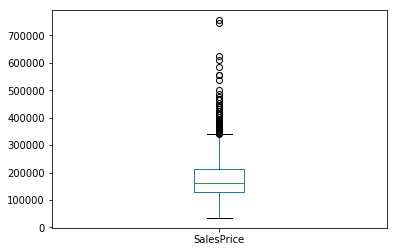

In [120]:
y.plot.box()

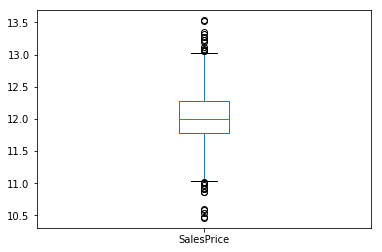

In [121]:
np.log(y).plot.box()

In [127]:
%%time
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy
                        , np.log(y), test_size = 0.3, random_state = 1234)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 1, 
                                include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha = 150, tol=0.0001) )
])

pipe.fit(X_train, y_train)
print("train R2", pipe.score(X_train, y_train), 
      "test R2:", pipe.score(X_test, y_test))

train R2 0.943548716384 test R2: 0.765580361372
CPU times: user 58 ms, sys: 7.56 ms, total: 65.5 ms
Wall time: 45.4 ms
